<a href="https://colab.research.google.com/github/bismrk/Python_projects/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Task_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

import seaborn as sns
from matplotlib import pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Test_data/Tech Task_Junior Data Analyst_Problem_2.csv')
df.head()

,Номер квітки,Садівник,Сорт,Почва,Фактор 1,Фактор 2,Дата посадки,Дата сходження,Дата зав'ядання,Причина зав'ядання
0,AN-7162,F,Класичний,Червона,1.0,6.0,2023-11-01,NaN,2023-11-10,Корні 1
1,AN-6931,S,Класичний,Синя,3.0,4.0,2023-11-01,NaN,2023-11-09,Жуки
2,AN-6352,Phoenix,ГМО,Жовта,1.0,10.0,2023-11-01,NaN,2023-11-06,Корні 1
3,AN-7242,Retro,Класичний,Зелена,3.0,6.0,2023-11-02,2023-11-05,2023-11-07,Жуки
4,AN-7314,R,ГМО,Зелена,3.0,6.0,2023-11-02,2023-11-02,2023-11-06,Жуки


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Номер квітки        265 non-null    object 
 1   Садівник            265 non-null    object 
 2   Сорт                257 non-null    object 
 3   Почва               257 non-null    object 
 4   Фактор 1            263 non-null    float64
 5   Фактор 2            259 non-null    float64
 6   Дата посадки        265 non-null    object 
 7   Дата сходження      124 non-null    object 
 8   Дата зав'ядання     196 non-null    object 
 9   Причина зав'ядання  185 non-null    object 
dtypes: float64(2), object(8)
memory usage: 20.8+ KB


#Очищаємо дані



In [ ]:
df.shape

(265, 10)

Чистимо датасет

In [ ]:
df.dropna(subset='Сорт',inplace=True)
df.shape

(257, 10)

In [ ]:
df.dropna(subset='Почва',inplace = True)
df.shape

(251, 10)

Переводимо дату в потрбіний формат та обчислимо lifetime та через скільки днів зійдуть квітки.

In [ ]:
df['Дата посадки'] = pd.to_datetime(df['Дата посадки'])
df["Дата зав'ядання"] = pd.to_datetime(df["Дата зав'ядання"])
df['Дата сходження'] = pd.to_datetime(df['Дата сходження'])

In [ ]:
df['Зійшли через'] = (df['Дата сходження']-df['Дата посадки']).dt.days
df.shape

(251, 11)

In [ ]:
#кілкість днів від посадки до зав'ядання квітки
df['lifetime'] = (df["Дата зав'ядання"] - df['Дата посадки']).dt.days
df.head(6)

,Номер квітки,Садівник,Сорт,Почва,Фактор 1,Фактор 2,Дата посадки,Дата сходження,Дата зав'ядання,Причина зав'ядання,Зійшли через,lifetime
0,AN-7162,F,Класичний,Червона,1.0,6.0,2023-11-01,NaT,2023-11-10,Корні 1,NaN,9.0
1,AN-6931,S,Класичний,Синя,3.0,4.0,2023-11-01,NaT,2023-11-09,Жуки,NaN,8.0
2,AN-6352,Phoenix,ГМО,Жовта,1.0,10.0,2023-11-01,NaT,2023-11-06,Корні 1,NaN,5.0
3,AN-7242,Retro,Класичний,Зелена,3.0,6.0,2023-11-02,2023-11-05,2023-11-07,Жуки,3.0,5.0
4,AN-7314,R,ГМО,Зелена,3.0,6.0,2023-11-02,2023-11-02,2023-11-06,Жуки,0.0,4.0
5,AN-7400,Droid,Класичний,Жовта,3.0,1.0,2023-11-02,2023-11-07,2023-11-20,Корні 1,5.0,18.0


In [ ]:
df.shape

(251, 12)

В колонці 'Зійшли через' не може бути відємних значень, видалимо їх.


In [ ]:
df[df['Зійшли через']<0].shape # тут не може бути відємних значень, тому приберемо ці рядки

(3, 12)

In [ ]:
# Очищений і підготовлений до роботи вже датасет
df = df[(df['Зійшли через']>=0) | (df['Зійшли через'].isna())]
df.shape

(248, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 262
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Номер квітки        248 non-null    object        
 1   Садівник            248 non-null    object        
 2   Сорт                248 non-null    object        
 3   Почва               248 non-null    object        
 4   Фактор 1            248 non-null    float64       
 5   Фактор 2            244 non-null    float64       
 6   Дата посадки        248 non-null    datetime64[ns]
 7   Дата сходження      116 non-null    datetime64[ns]
 8   Дата зав'ядання     189 non-null    datetime64[ns]
 9   Причина зав'ядання  181 non-null    object        
 10  Зійшли через        116 non-null    float64       
 11  lifetime            189 non-null    float64       
dtypes: datetime64[ns](3), float64(4), object(5)
memory usage: 25.2+ KB


# Датасет в якому квіти жили 5+ днів, і всі квіти ЗІЙШЛИ

In [ ]:
#Залишаємо лише ті квітки у яких життя мінімум 5 днів було. Обрізаний датасет без Nan в Сортах, та в Почві
df2 = df[df['lifetime']>=5]

In [ ]:
df2.dropna(subset='Зійшли через',inplace=True)
df2.shape

<ipython-input-122-d635515a7d6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset='Зійшли через',inplace=True)


(68, 12)

Аналізуємо по почві, квіти ЗІЙШЛИ і прожили 5+ днів

In [ ]:
pochva2 = pd.DataFrame(columns=['Почва', 'К-ть початкова', 'Зішла і прожила 5+', 'Ймовірність'])
# Розбивка по почві , квіти зійшли і жили 5+ днів
for i in df2['Почва'].unique():
  x = df2[df2['Почва']==i].shape[0] # Зішла і прожила 5+'
  y = df[df['Почва']==i].shape[0] # К-ть початкова
  z = round(x/y,2) # Ймовірність шо квітка зійде і проживе 5+
  pochva2 = pd.concat([pochva2,pd.DataFrame({
      'Почва': [i],
      'К-ть початкова':[y],
      'Зішла і прожила 5+':[x],
      'Ймовірність':[z]
  })],ignore_index=True)
pochva2

,Почва,К-ть початкова,Зішла і прожила 5+,Ймовірність
0,Зелена,103,42,0.41
1,Жовта,88,13,0.15
2,Синя,16,1,0.06
3,Червона,41,12,0.29


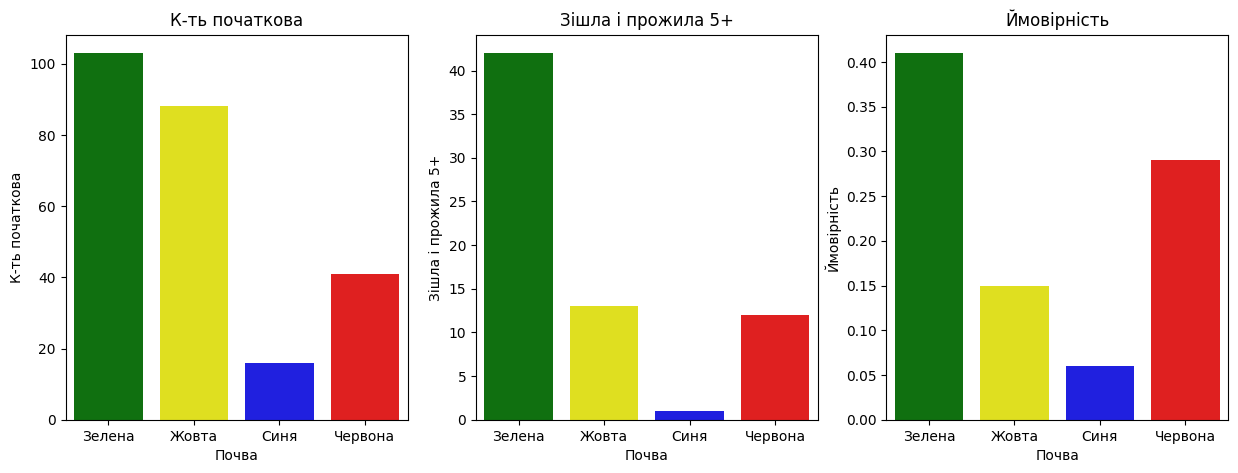

In [ ]:
color = ['green', 'yellow', 'blue', 'red']
col = pochva2.columns

fig, axes = plt.subplots(1, len(col) - 1, figsize=(15,5))

for a, c in zip(axes, col[1:]):
    sns.barplot(ax=a, x='Почва', y=c, data=pochva2, palette=color).set(title=c)

plt.show()

Аналізуємо по сортах, квіти ЗІЙШЛИ і прожили 5+ днів

In [ ]:
sort = pd.DataFrame(columns=['Сорт', 'К-ть початкова', 'Зішла і прожила 5+', 'Ймовірність'])
# Розбивка по почві , квіти зійшли і жили 5+ днів
for i in df2['Сорт'].unique():
  x = df2[df2['Сорт']==i].shape[0] # Зішла і прожила 5+'
  y = df[df['Сорт']==i].shape[0] # К-ть початкова
  z = round(x/y, 2) # Ймовірність шо квітка зійде і проживе 5+
  sort = pd.concat([sort,pd.DataFrame({
      'Сорт': [i],
      'К-ть початкова':[y],
      'Зішла і прожила 5+':[x],
      'Ймовірність':[z]
  })],ignore_index=True)
sort

,Сорт,К-ть початкова,Зішла і прожила 5+,Ймовірність
0,Класичний,168,39,0.23
1,Імпорт,29,11,0.38
2,ГМО,51,18,0.35


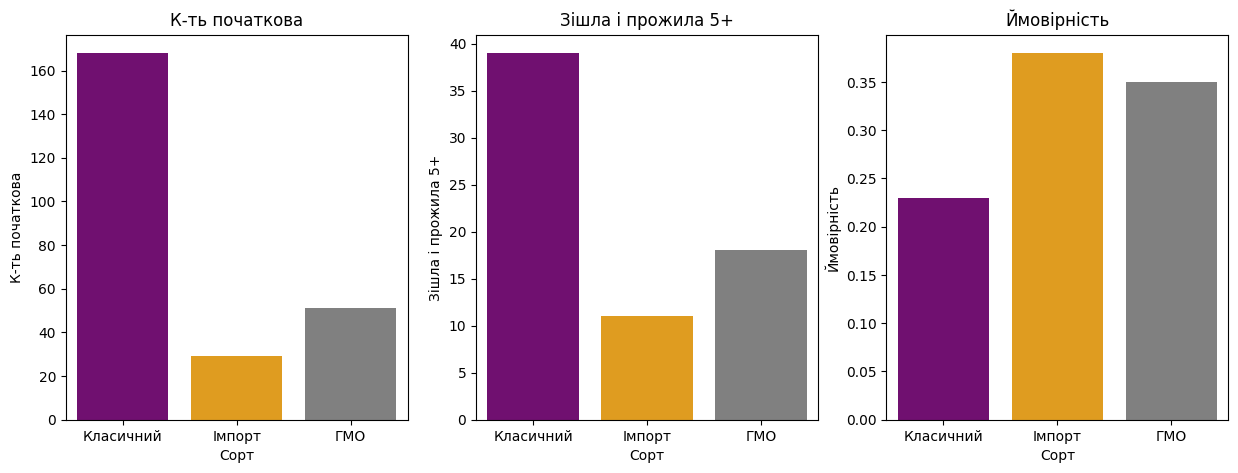

In [ ]:
color = ['Purple', 'Orange', 'Gray']
col=sort.columns

fig, axes = plt.subplots(1, len(col)-1, figsize=(15,5))

for a, c in zip(axes, col[1:]):
  sns.barplot(ax=a, x='Сорт', y=c, data=sort, palette=color).set(title=c)

plt.show();

# Детальний аналіз

In [ ]:
sort_ground = pd.DataFrame(columns=['Почва',
                                     'Сорт',
                                     'Кількість квіток',
                                     'Квіти що ЗІЙШЛИ,і жили 5+',
                                     "Ймовірність що квітка зійде і проживе 5+ днів"])
#df3 = df[(df['lifetime']>=5)&(df['Дата сходження'].isna())]

for i in df2['Почва'].unique():
  for j in df2['Сорт'].unique():
    x = df2[(df2['Почва']==i) & (df2['Сорт']==j)].shape[0] # Квіти що ЗІЙШЛИ,і жили 5+
    y = df[(df['Почва']==i) & (df['Сорт']==j)].shape[0] # Загальна Кількість квіток
    if y !=0 :
      z = round(x/y,2) # ймовірність що квітка зійде і проживе 5+ днів
    sort_ground = pd.concat([sort_ground,pd.DataFrame({
        'Почва': [i],
        'Сорт': [j],
        'Кількість квіток': [y],
        'Квіти що ЗІЙШЛИ,і жили 5+': [x],
        "Ймовірність що квітка зійде і проживе 5+ днів": [z]
    })],ignore_index=True)
sort_ground

,Почва,Сорт,Кількість квіток,"Квіти що ЗІЙШЛИ,і жили 5+",Ймовірність що квітка зійде і проживе 5+ днів
0,Зелена,Класичний,49,20,0.41
1,Зелена,Імпорт,20,10,0.50
2,Зелена,ГМО,34,12,0.35
3,Жовта,Класичний,76,9,0.12
4,Жовта,Імпорт,4,0,0.00
5,Жовта,ГМО,8,4,0.50
6,Синя,Класичний,9,1,0.11
7,Синя,Імпорт,4,0,0.00
8,Синя,ГМО,3,0,0.00
9,Червона,Класичний,34,9,0.26


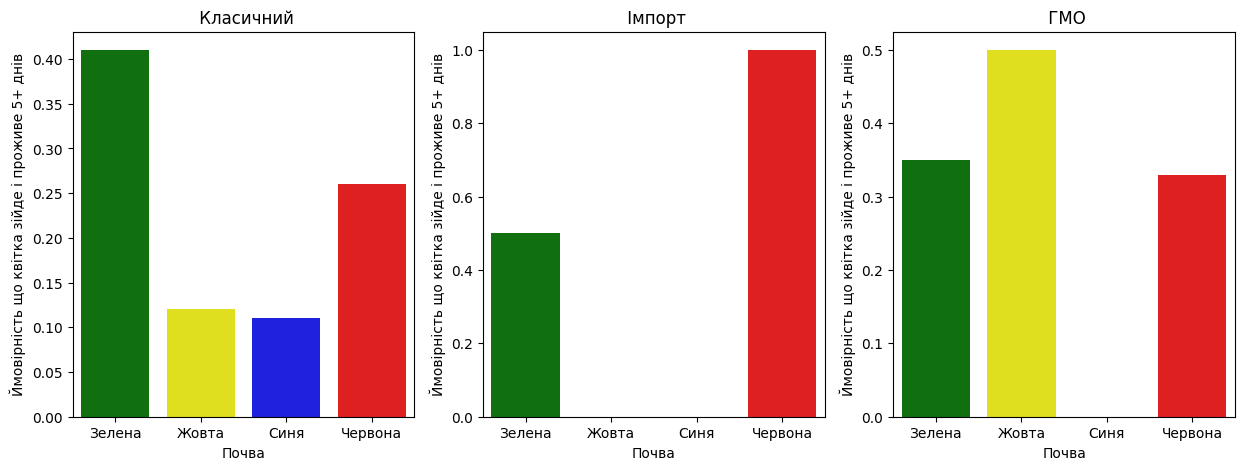

In [ ]:
# Ймовірність що квітка зійде і проживе 5+ днів по СОРТАМ
color = ['green', 'yellow', 'blue', 'red']
col = sort_ground.columns

fig, axes = plt.subplots(1, len(col)-2, figsize=(15,5))

for i, a, c in zip(sort_ground['Сорт'].unique(), axes, col[1:]):
  col_data = sort_ground[sort_ground['Сорт']==i]
  sns.barplot(ax=a, x='Почва', y='Ймовірність що квітка зійде і проживе 5+ днів', data=col_data, palette=color).set(title=f" {i}")
plt.show();


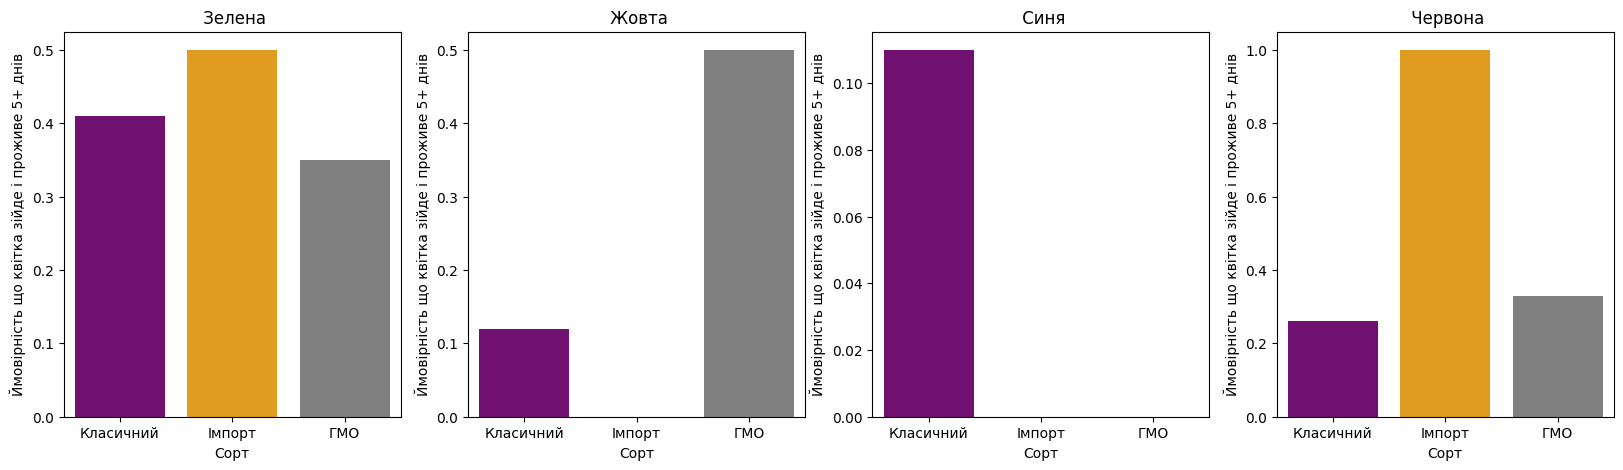

In [ ]:
# Ймовірність що квітка зійде і проживе 5+ днів по ПОЧВІ
color = ['Purple','Orange','Gray']
col = sort_ground.columns

fig, axes = plt.subplots(1, len(col)-1, figsize=(20,5))

for i, a, c in zip(sort_ground['Почва'].unique(), axes, col[1:]):
  col_data = sort_ground[sort_ground['Почва']==i]
  sns.barplot(ax=a, x='Сорт', y='Ймовірність що квітка зійде і проживе 5+ днів', data=col_data, palette=color).set(title=f" {i}")
plt.show();

#Порівняльний аналіз сходження та тривалості життя квітів, посаджених до
27.11 та з 27.11

In [ ]:
df27=df.copy()
df27 = df[df['Дата посадки']>='2023-11-27']
df27

,Номер квітки,Садівник,Сорт,Почва,Фактор 1,Фактор 2,Дата посадки,Дата сходження,Дата зав'ядання,Причина зав'ядання,Зійшли через,lifetime
160,AN-9716,S,Класичний,Жовта,3.0,3.0,2023-11-27,NaT,2023-11-30,Корні 1,NaN,3.0
161,AN-9835,Droid,Класичний,Зелена,4.0,6.0,2023-11-27,2023-11-28,2023-11-28,Невідома,1.0,1.0
162,AN-9730,L,Класичний,Жовта,4.0,5.0,2023-11-27,2023-11-30,2023-12-06,Жуки,3.0,9.0
163,AN-9497,P K,Класичний,Червона,3.0,4.0,2023-11-27,2023-11-30,2023-12-13,Жуки,3.0,16.0
164,AN-9407,F,Класичний,Жовта,3.0,6.0,2023-11-27,2023-11-30,2023-12-05,Жуки,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
258,AN-11705,F,Імпорт,Зелена,3.0,4.0,2023-12-12,2023-12-12,NaT,NaN,0.0,NaN
259,AN-11551,Dark,Імпорт,Зелена,5.0,10.0,2023-12-12,NaT,NaT,NaN,NaN,NaN
260,AN-11416,Dw,ГМО,Зелена,3.0,4.0,2023-12-12,NaT,NaT,NaN,NaN,NaN
261,AN-11109,Droid,ГМО,Червона,3.0,3.0,2023-12-12,NaT,NaT,NaN,NaN,NaN


In [ ]:
df26=df.copy()
df26 = df[df['Дата посадки']<'2023-11-27']
df26.shape

(150, 12)

Квіти після 27.11

In [ ]:
sort_ground = pd.DataFrame(columns=['Почва',
                                     'Сорт',
                                     'Кількість квіток',
                                     'Квіти що ЗІЙШЛИ,і жили 5+',
                                     "Ймовірність що квітка зійде і проживе 5+ днів"])
#df3 = df[(df['lifetime']>=5)&(df['Дата сходження'].isna())]

for i in df27['Почва'].unique():
  for j in df27['Сорт'].unique():
    x = df27[(df27['Почва']==i) & (df27['Сорт']==j)].shape[0] # Квіти що ЗІЙШЛИ,і жили 5+
    y = df[(df['Почва']==i) & (df['Сорт']==j)].shape[0] # Загальна Кількість квіток
    if y !=0 :
      z = round(x/y,2) # ймовірність що квітка зійде і проживе 5+ днів
    sort_ground = pd.concat([sort_ground,pd.DataFrame({
        'Почва': [i],
        'Сорт': [j],
        'Кількість квіток': [y],
        'Квіти що ЗІЙШЛИ,і жили 5+': [x],
        "Ймовірність що квітка зійде і проживе 5+ днів": [z]
    })],ignore_index=True)
sort_ground

In [ ]:
# Ймовірність що квітка зійде і проживе 5+ днів по ПОЧВІ
color = ['Purple','Orange','Gray']
col = sort_ground.columns

fig, axes = plt.subplots(1, len(col)-1, figsize=(20,5), sharey=True)
fig.suptitle('Ймовірність що квітка зійде і проживе 5+ днів (після 27.11) по сортах', fontsize=16)

for i, a, c in zip(sort_ground['Почва'].unique(), axes, col[1:]):
  col_data = sort_ground[sort_ground['Почва']==i]
  sns.barplot(ax=a, x='Сорт', y='Ймовірність що квітка зійде і проживе 5+ днів', data=col_data, palette=color).set(title=f" {i}")
plt.show();

In [ ]:
# Ймовірність що квітка зійде і проживе 5+ днів по СОРТАМ
color = ['yellow', 'green', 'red', 'blue']
col = sort_ground.columns

fig, axes = plt.subplots(1, len(col)-2, figsize=(15,5), sharey=True)
fig.suptitle('Ймовірність що квітка зійде і проживе 5+ днів (після 27.11) по почві', fontsize=16)

for i, a, c in zip(sort_ground['Сорт'].unique(), axes, col[1:]):
  col_data = sort_ground[sort_ground['Сорт']==i]
  sns.barplot(ax=a, x='Почва', y='Ймовірність що квітка зійде і проживе 5+ днів', data=col_data, palette=color).set(title=f" {i}")
plt.show();

Квіти до 27.11

In [ ]:
sort_ground = pd.DataFrame(columns=['Почва',
                                     'Сорт',
                                     'Кількість квіток',
                                     'Квіти що ЗІЙШЛИ,і жили 5+',
                                     "Ймовірність що квітка зійде і проживе 5+ днів"])
#df3 = df[(df['lifetime']>=5)&(df['Дата сходження'].isna())]

for i in df26['Почва'].unique():
  for j in df26['Сорт'].unique():
    x = df26[(df26['Почва']==i) & (df26['Сорт']==j)].shape[0] # Квіти що ЗІЙШЛИ,і жили 5+
    y = df[(df['Почва']==i) & (df['Сорт']==j)].shape[0] # Загальна Кількість квіток
    if y !=0 :
      z = round(x/y,2) # ймовірність що квітка зійде і проживе 5+ днів
    sort_ground = pd.concat([sort_ground,pd.DataFrame({
        'Почва': [i],
        'Сорт': [j],
        'Кількість квіток': [y],
        'Квіти що ЗІЙШЛИ,і жили 5+': [x],
        "Ймовірність що квітка зійде і проживе 5+ днів": [z]
    })],ignore_index=True)
sort_ground

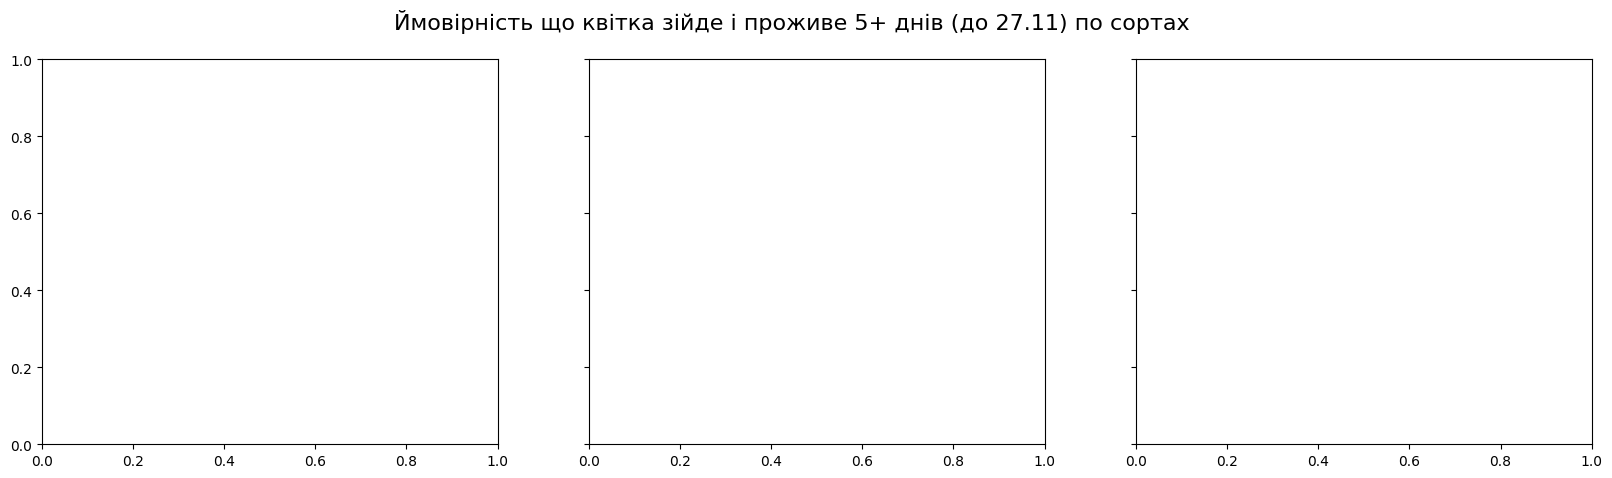

In [ ]:
# Ймовірність що квітка зійде і проживе 5+ днів по ПОЧВІ
color = ['Purple','Orange','Gray']
col = sort_ground.columns

fig, axes = plt.subplots(1, len(col)-1, figsize=(20,5), sharey=True)
fig.suptitle('Ймовірність що квітка зійде і проживе 5+ днів (до 27.11) по сортах', fontsize=16)

for i, a, c in zip(sort_ground['Почва'].unique(), axes, col[1:]):
  col_data = sort_ground[sort_ground['Почва']==i]
  sns.barplot(ax=a, x='Сорт', y='Ймовірність що квітка зійде і проживе 5+ днів', data=col_data, palette=color).set(title=f" {i}")
plt.show();

In [ ]:
# Ймовірність що квітка зійде і проживе 5+ днів по СОРТАМ
color = ['red', 'blue', 'yellow', 'green',]
col = sort_ground.columns

fig, axes = plt.subplots(1, len(col)-2, figsize=(15,5), sharey=True)
fig.suptitle('Ймовірність що квітка зійде і проживе 5+ днів (до 27.11) по почві', fontsize=16)

for i, a, c in zip(sort_ground['Сорт'].unique(), axes, col[1:]):
  col_data = sort_ground[sort_ground['Сорт']==i]
  sns.barplot(ax=a, x='Почва', y='Ймовірність що квітка зійде і проживе 5+ днів', data=col_data, palette=color).set(title=f" {i}")
plt.show();

Порівняльний аналіз тривалості життя

In [ ]:
df_sort27 = round(df27.groupby('Сорт')['lifetime'].mean(),2)
df_sort27 = pd.DataFrame(df_sort27).reset_index()

df_sort26 = round(df26.groupby('Сорт')['lifetime'].mean(),2)
df_sort26 = pd.DataFrame(df_sort26).reset_index()

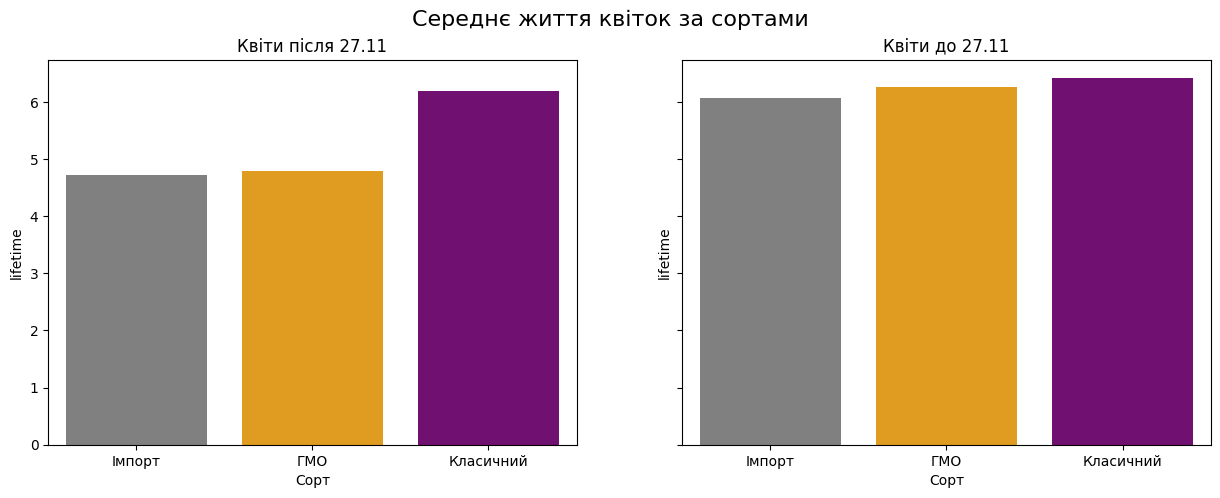

In [ ]:
color = ['gray','orange','purple']

fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle('Середнє життя квіток за сортами', fontsize=16)

sns.barplot(ax=axes[0], x='Сорт', y='lifetime', data=df_sort27, palette=color).set(title='Квіти після 27.11')
sns.barplot(ax=axes[1], x='Сорт', y='lifetime', data=df_sort26, palette=color).set(title='Квіти до 27.11');

In [ ]:
result27 = round(df27.groupby('Почва')['lifetime'].mean(),2)
df_result27 = pd.DataFrame(result27).reset_index()

result26 = round(df26.groupby('Почва')['lifetime'].mean(),2)
df_result26 = pd.DataFrame(result26).reset_index()

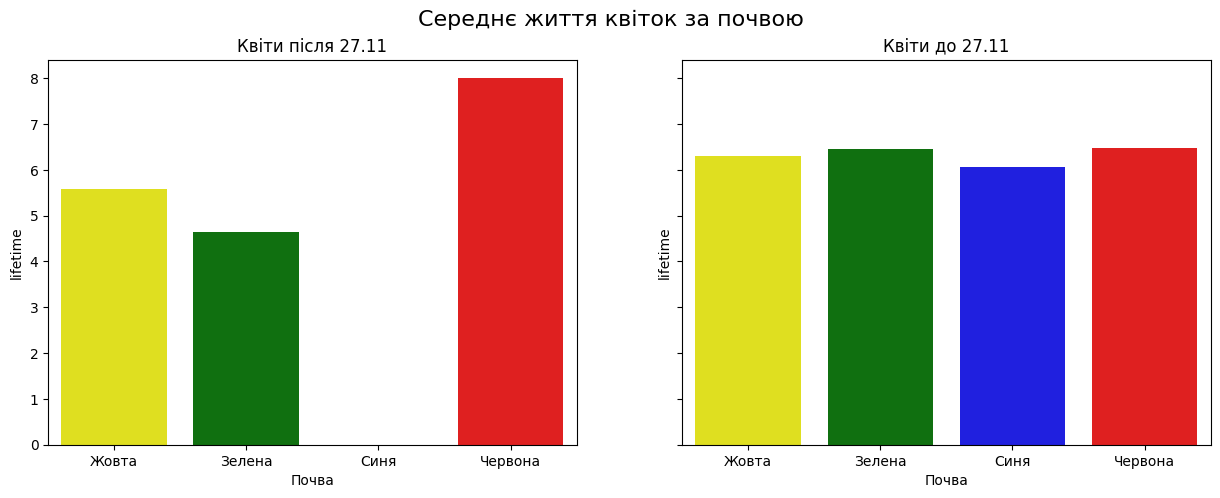

In [ ]:
color = ['yellow','green','blue','red']

fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle('Середнє життя квіток за почвою', fontsize=16)

sns.barplot(ax=axes[0], x='Почва', y='lifetime', data=df_result27, palette=color).set(title='Квіти після 27.11')
sns.barplot(ax=axes[1], x='Почва', y='lifetime', data=df_result26, palette=color).set(title='Квіти до 27.11');

#Причини Завядання


In [ ]:
dfr = df.copy()
dfr.dropna(subset="Причина зав'ядання",inplace=True)
df_reason = pd.DataFrame(columns=["Причина зав'ядання","Кількість"])
for i in dfr["Причина зав'ядання"].unique():
  x1 = dfr[(dfr["Причина зав'ядання"]==i) & (dfr["Причина зав'ядання"].notna())].shape[0]
  df_reason = pd.concat([df_reason,pd.DataFrame({
      "Причина зав'ядання": [i]
      ,"Кількість": [x1]
  })],ignore_index=True)

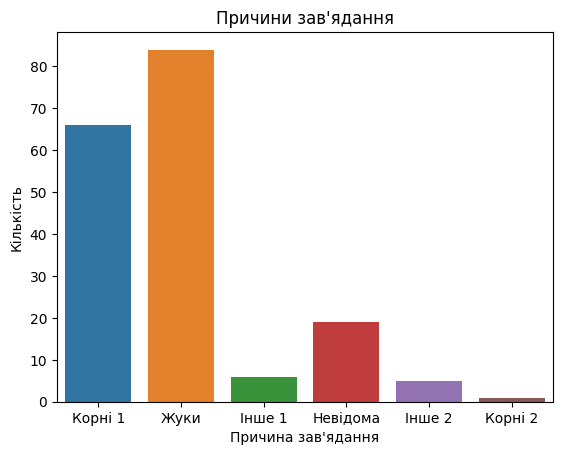

In [ ]:
for i in df_reason["Причина зав'ядання"].unique():
  sns.barplot(x="Причина зав'ядання",y='Кількість',data=df_reason)
  plt.title("Причини зав'ядання");

In [ ]:
df3 = df.copy()
df3 = df3[df3["Причина зав'ядання"]=='Жуки']
df3.shape

(84, 12)

In [ ]:
# К-ть квіток по сортам які зїли жуки

reason_sort = pd.DataFrame(columns = ['Сорт', 'Кількість квіток'])
for i in df3['Сорт'].unique():
  x1 = df3[df3['Сорт']==i].shape[0]
  reason_sort = pd.concat([reason_sort,pd.DataFrame({
      'Сорт': [i],
      'Кількість квіток': [x1]
  })],ignore_index=True)
reason_sort

,Сорт,Кількість квіток
0,Класичний,62
1,ГМО,21
2,Імпорт,1


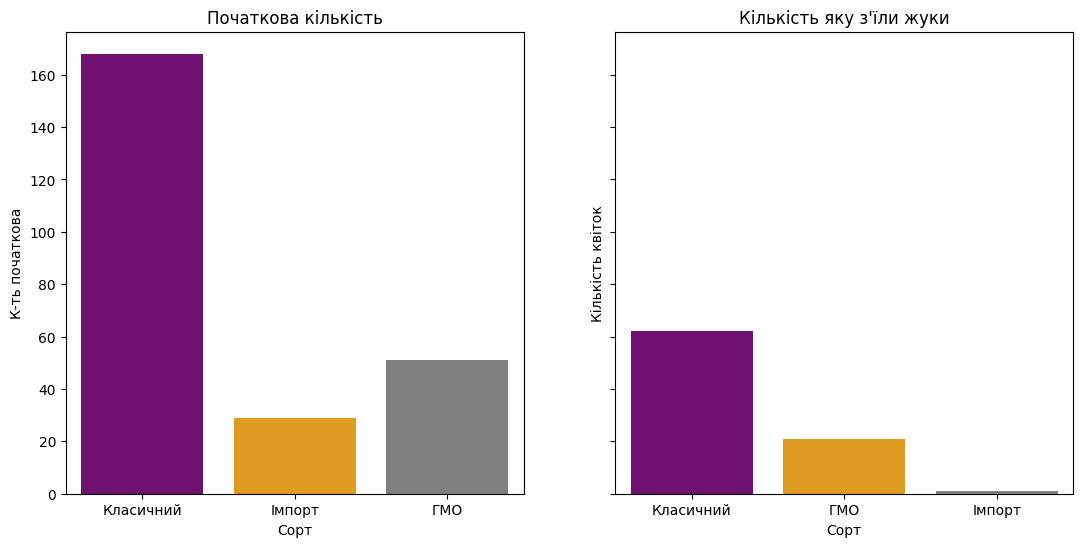

In [ ]:
# подивитись які сорти, та які почви люблять найбільше , подивитись які садівники справились краще
color = ['Purple','Orange','Gray']
fig,axes = plt.subplots(1,2, figsize=(13,6), sharey=True)
sns.barplot(ax=axes[0], x='Сорт', y='К-ть початкова', data=sort, palette=color).set(title='Початкова кількість')
sns.barplot(ax=axes[1], x='Сорт', y='Кількість квіток', data=reason_sort, palette=color).set(title="Кількість яку з'їли жуки")
plt.show()

In [ ]:
reason_pochva = pd.DataFrame(columns = ['Почва', 'Кількість квіток'])
for i in df3['Почва'].unique():
  x1 = df3[df3['Почва']==i].shape[0]
  reason_pochva = pd.concat([reason_pochva,pd.DataFrame({
      'Почва': [i],
      'Кількість квіток': [x1]
  })],ignore_index=True)
reason_pochva

,Почва,Кількість квіток
0,Синя,5
1,Зелена,33
2,Жовта,34
3,Червона,12


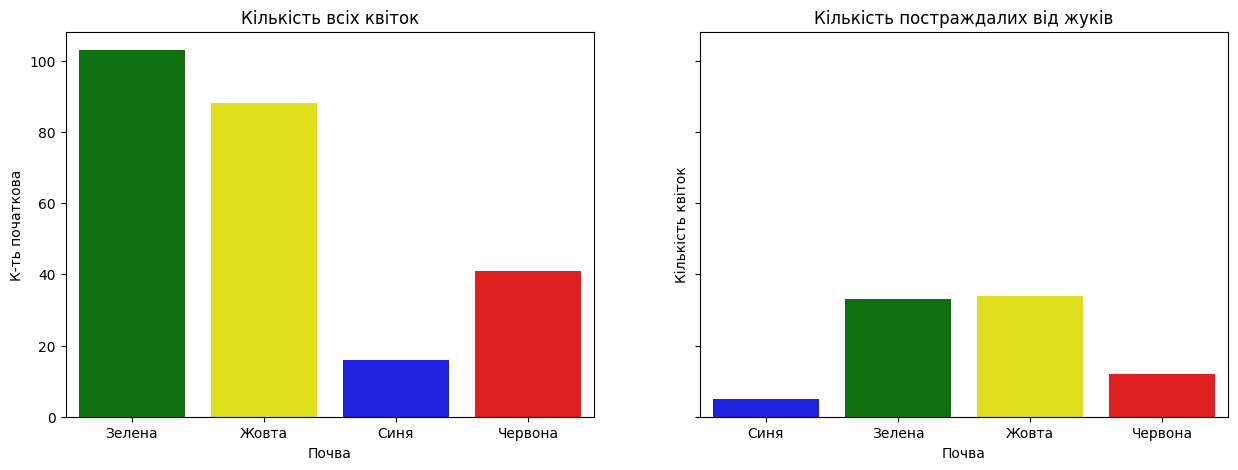

In [ ]:
color = ['green', 'yellow', 'blue', 'red']

fig,axes = plt.subplots(1,2, figsize=(15,5), sharey=True)

sns.barplot(ax=axes[0], x='Почва', y='К-ть початкова', data=pochva2, palette=color).set(title='Кількість всіх квіток') # кількість всіх квіток
color = ['blue', 'green', 'yellow', 'red']
sns.barplot(ax=axes[1], x='Почва', y='Кількість квіток', data=reason_pochva, palette=color).set(title='Кількість постраждалих від жуків') # кількісіть ск жуки зїли

plt.show()

#Bonus Task

In [ ]:
# Визначення функції для обчислення рейтингів
def calculate_rating(lifetime):
    if lifetime is None or lifetime < 3:
        return 0
    elif 3 <= lifetime <= 4:
        return 1
    elif 5<= lifetime < 10:
        return 2
    elif 10<= lifetime < 13:
        return 4
    elif 13<= lifetime < 20:
        return 6
    elif lifetime >= 20:
        return 8
    else:
        return 0
df['rating'] = df['lifetime'].apply(calculate_rating)

df

,Номер квітки,Садівник,Сорт,Почва,Фактор 1,Фактор 2,Дата посадки,Дата сходження,Дата зав'ядання,Причина зав'ядання,Зійшли через,lifetime,rating
0,AN-7162,F,Класичний,Червона,1.0,6.0,2023-11-01,NaT,2023-11-10,Корні 1,NaN,9.0,2
1,AN-6931,S,Класичний,Синя,3.0,4.0,2023-11-01,NaT,2023-11-09,Жуки,NaN,8.0,2
2,AN-6352,Phoenix,ГМО,Жовта,1.0,10.0,2023-11-01,NaT,2023-11-06,Корні 1,NaN,5.0,2
3,AN-7242,Retro,Класичний,Зелена,3.0,6.0,2023-11-02,2023-11-05,2023-11-07,Жуки,3.0,5.0,2
4,AN-7314,R,ГМО,Зелена,3.0,6.0,2023-11-02,2023-11-02,2023-11-06,Жуки,0.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,AN-11705,F,Імпорт,Зелена,3.0,4.0,2023-12-12,2023-12-12,NaT,NaN,0.0,NaN,0
259,AN-11551,Dark,Імпорт,Зелена,5.0,10.0,2023-12-12,NaT,NaT,NaN,NaN,NaN,0
260,AN-11416,Dw,ГМО,Зелена,3.0,4.0,2023-12-12,NaT,NaT,NaN,NaN,NaN,0
261,AN-11109,Droid,ГМО,Червона,3.0,3.0,2023-12-12,NaT,NaT,NaN,NaN,NaN,0
